<a href="https://colab.research.google.com/github/abhinav-k13/DL_Lab/blob/main/DL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (240, 10304)
y_train shape: (240,)
x_test shape: (160, 10304)
x_train shape: (228, 112, 92, 1)
y_train shape: (228, 20)
x_valid shape: (12, 112, 92, 1)
y_valid shape: (12, 20)
x_test shape: (160, 112, 92, 1)
y_test shape: (160, 20)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 - 17s - 4s/step - accuracy: 0.0570 - loss: 3.7748 - val_accuracy: 0.0000e+00 - val_loss: 3.0277
Epoch 2/5
4/4 - 0s - 38ms/step - accuracy: 0.0439 - loss: 2.9981 - val_accuracy: 0.0000e+00 - val_loss: 3.0010
Epoch 3/5
4/4 - 0s - 73ms/step - accuracy: 0.0833 - loss: 2.9896 - val_accuracy: 0.0000e+00 - val_loss: 3.0404
Epoch 4/5
4/4 - 0s - 40ms/step - accuracy: 0.0746 - loss: 2.9799 - val_accuracy: 0.0000e+00 - val_loss: 3.0359
Epoch 5/5
4/4 - 0s - 71ms/step - accuracy: 0.0965 - loss: 2.9768 - val_accuracy: 0.0000e+00 - val_loss: 2.9994
Test loss: 2.9709
Test accuracy: 0.0750
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


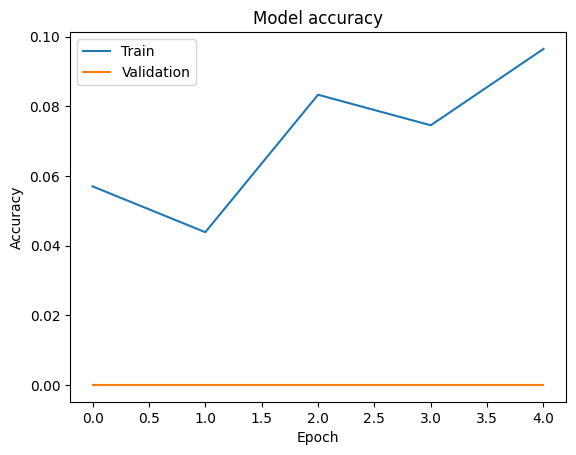

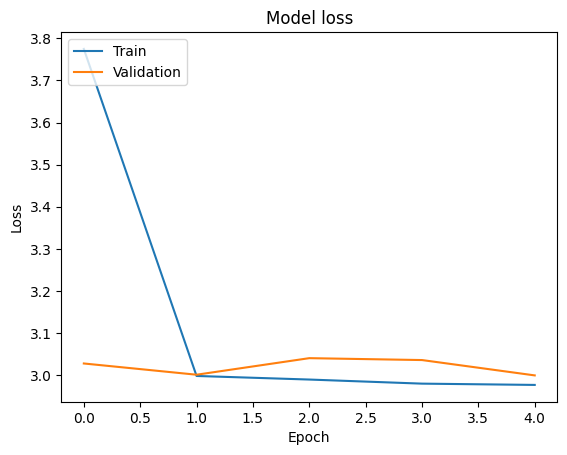

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import itertools

# Load dataset
data = np.load('ORL_faces.npz')

# Load the "Train Images"
x_train = data['trainX']
# Normalize every image
x_train = np.array(x_train, dtype='float32') / 255

x_test = data['testX']
x_test = np.array(x_test, dtype='float32') / 255

# Load the label of images
y_train = data['trainY']
y_test = data['testY']

# Show the train and test data format
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

# Split validation set from training set
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.05, random_state=1234
)

# Image dimensions and reshaping the dataset
im_rows = 112
im_cols = 92
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(-1, *im_shape)
x_test = x_test.reshape(-1, *im_shape)
x_valid = x_valid.reshape(-1, *im_shape)

# One-hot encode the labels
num_classes = 20  # Assuming 20 classes for ORL_faces dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_valid = to_categorical(y_valid, num_classes=num_classes)

# Print shapes after encoding and reshaping
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_valid shape: {}'.format(x_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

# CNN model architecture
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),  # Removed duplicate input_shape
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjusted to match the number of classes
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Model summary
cnn_model.summary()

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    verbose=2,
    validation_data=(x_valid, y_valid)
)


# Evaluate the model on the test set
scor = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

print('Test loss: {:.4f}'.format(scor[0]))
print('Test accuracy: {:.4f}'.format(scor[1]))

# Plot training history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()